In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df.duplicated().sum()

401

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# lets check the unique values in every columns

for  i in df.columns:
    print(i ,":-")
    print(df[i].unique())
    print("*************************************")



POSTED_BY :-
['Owner' 'Dealer' 'Builder']
*************************************
UNDER_CONSTRUCTION :-
[0 1]
*************************************
RERA :-
[0 1]
*************************************
BHK_NO. :-
[ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
*************************************
BHK_OR_RK :-
['BHK' 'RK']
*************************************
SQUARE_FT :-
[1300.236407  1275.         933.1597222 ... 1022.641509   927.0790093
  896.7741935]
*************************************
READY_TO_MOVE :-
[1 0]
*************************************
RESALE :-
[1 0]
*************************************
ADDRESS :-
['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']
*************************************
LONGITUDE :-
[12.96991  12.274538 12.778033 ... 18.9737   17.357159 39.945409]
*************************************
LATITUDE :-
[ 77.59796   76.644605  77.632191 ...  73.3321 

In [9]:
# accoring to the research poster by ,longitude and latitude are not that compulsary feature that are affecting the prediction
df.drop(['POSTED_BY'],axis =1,inplace = True)

In [10]:
numerical_features = df.select_dtypes(exclude=('object'))

<Axes: >

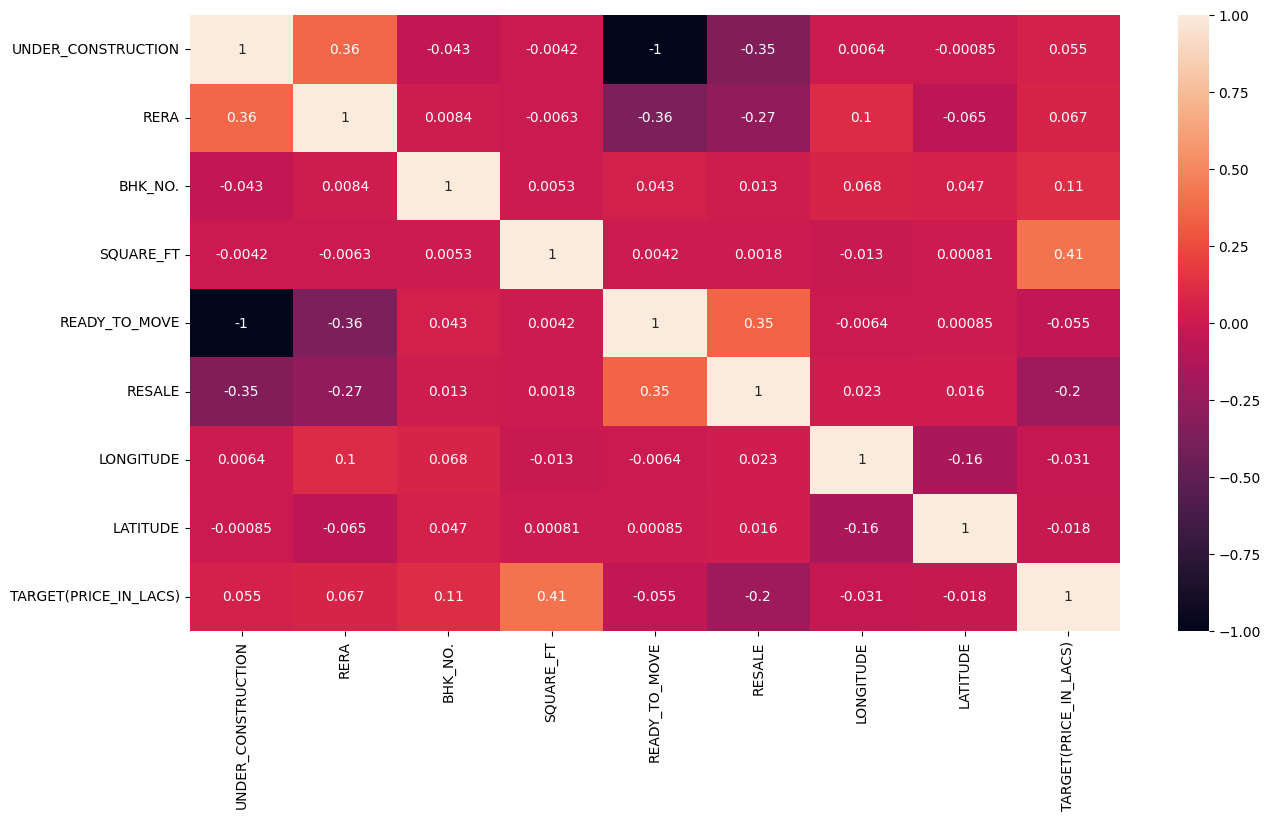

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(numerical_features.corr(),annot=True)

In [12]:
# as we can also see that longitude and latitude are highly correleated with other feature so we can remove them 
df.drop(columns=['LONGITUDE','LATITUDE'],axis =1,inplace = True)

In [13]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",43.0
3,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5
4,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",60.5


In [14]:
df['ADDRESS']

0                    Ksfc Layout,Bangalore
1                Vishweshwara Nagar,Mysore
2                         Jigani,Bangalore
3              Sector-1 Vaishali,Ghaziabad
4                         New Town,Kolkata
                       ...                
29446                 Shamshabad Road,Agra
29447    E3-108, Lake View Recidency,,Vapi
29448                    Ajmer Road,Jaipur
29449               Sholinganallur,Chennai
29450                     Jagatpura,Jaipur
Name: ADDRESS, Length: 29050, dtype: object

In [15]:
# as we can see that in address section/series we have the city name at the end of the address so we can remove it and use it in place of address 
def extractor(value):
    value = value.split(',')
    value = value[-1]
    return value.strip()

In [16]:
df['ADDRESS'] = df['ADDRESS'].apply(extractor)

In [17]:
a = df['ADDRESS'].unique()
a

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [18]:
a[128:]


array(['Junagadh', 'Moradabad', 'Ahmednagar', 'Jalna', 'Bhiwani',
       'Palakkad', 'Kannur', 'Karjat', 'Akola', 'Jind', 'Gaya', 'Ambala',
       'Ajmer', 'Hajipur', 'Dharwad', 'Pudukkottai', 'Kollam', 'Ooty',
       'Bhandara', 'Barabanki', 'Rajpura', 'Palwal', 'Aligarh', 'Erode',
       'Rudrapur', 'Tenali', 'Ongole', 'Nizamabad', 'Puri', 'Dalhousie',
       'Siddipet', 'Solan', 'Darbhanga', 'Kadapa', 'Kakinada', 'Agartala',
       'Warangal', 'Haldwani', 'Osmanabad', 'Bhagalpur', 'Bardhaman',
       'Rishikesh', 'Chandrapur', 'Bokaro', 'Jharsuguda', 'Bhimavaram',
       'Kurnool', 'Amroha', 'Hapur', 'Sabarkantha', 'Harda', 'Ujjain',
       'Thoothukudi', 'Karaikudi', 'Mathura', 'Gadhinglaj', 'Rewari',
       'Godhra', 'Kharagpur', 'Srikakulam', 'Srinagar', 'Midnapore',
       'Rayagada', 'Banswara', 'Shirdi', 'Rohtak', 'Pali', 'Hathras',
       'Yavatmal', 'Balasore', 'Chhindwara', 'Bareilly', 'Vidisha',
       'Thanjavur', 'Kangra', 'Bikaner', 'Rewa', 'Porbandar', 'Nagaur',
      

In [19]:

def mapper(value):
    if value in ['Bangalore','Kolkata','Jaipur','Chennai','Dehradun','Shimla','Mumbai','Pune','Goa','Maharashtra']:
        return 'Tier_1'
    elif value in ['Faridabad', 'Lalitpur', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', 'Ratnagiri', 'Meerut', 'Kotdwara',
       'Jalandhar', 'Amritsar', 'Patiala', 'Ludhiana', 'Alwar', 'Kota',
       'Panaji', 'Kolhapur', 'Ernakulam', 'Bhavnagar', 'Bharuch']:
        
        
        
        
        return 'Tier_2'
    else:
        return 'Tier_3'

In [20]:
df['ADDRESS'] = df['ADDRESS'].apply(mapper)

In [21]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,Tier_1,55.0
1,0,0,2,BHK,1275.000000,1,1,Tier_3,51.0
2,0,0,2,BHK,933.159722,1,1,Tier_1,43.0
3,0,1,2,BHK,929.921143,1,1,Tier_3,62.5
4,1,0,2,BHK,999.009247,0,1,Tier_1,60.5


In [22]:
df.duplicated().sum()

2073

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(26977, 9)

In [25]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [26]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,Tier_1,55.0
1,0,0,2,BHK,1275.000000,1,1,Tier_3,51.0
2,0,0,2,BHK,933.159722,1,1,Tier_1,43.0
3,0,1,2,BHK,929.921143,1,1,Tier_3,62.5
4,1,0,2,BHK,999.009247,0,1,Tier_1,60.5


In [27]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [29]:
numerical_features = X.select_dtypes(exclude=('object')).columns
categorical_features = X.select_dtypes(include=('object')).columns

In [30]:
numerical_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('ohe',OneHotEncoder())
])


preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_pipeline,numerical_features),
    ('cat',categorical_pipeline,categorical_features)
])

In [39]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=50,random_state=42))
    # ('model',DecisionTreeRegressor())
    # ('model',GradientBoostingRegressor())
])

In [40]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['BHK_OR_RK', 'ADDRESS'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(r2_score(y_test,y_pred))

0.8862828885118588


<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='TARGET(PRICE_IN_LACS)'>

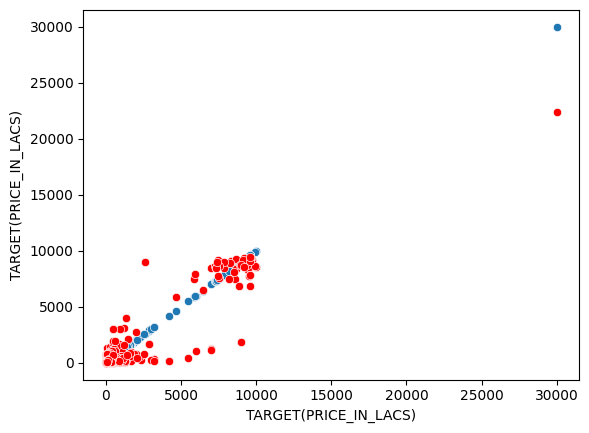

In [43]:
sns.scatterplot(x=y_test,y=y_test)
sns.scatterplot(x=y_test,y=y_pred, c = 'red')

In [44]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model, file)
file.close()

In [45]:
df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,BHK,1300.236407,1,1,Tier_1,55.0
1,0,0,2,BHK,1275.000000,1,1,Tier_3,51.0
2,0,0,2,BHK,933.159722,1,1,Tier_1,43.0
3,0,1,2,BHK,929.921143,1,1,Tier_3,62.5
4,1,0,2,BHK,999.009247,0,1,Tier_1,60.5


In [46]:
df['RESALE'].unique()

array([1, 0], dtype=int64)

In [129]:
a = [2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11]
a.sort()

In [130]:
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 20]